### Bike sharing Assignment - Vyankatesh Kale

- Problem Statement :A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


- In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all-around and stand out from other service providers and make huge profits.


- They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 


- The company wants to know:


- Which variables are significant in predicting the demand for shared bikes?,How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors


## Reading and Understanding the Data

In [1]:
#Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load The Dataset
bike = pd.read_csv(r'C:\Users\Admin\Desktop\Data Science\Machine Learning\Bike sharing Assignment\day (1).csv')

In [4]:
# Checking the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Checking the shape of the dataset
bike.shape

(730, 16)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Checking the null values in dataset
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Rename the columns in the dataset for better Understanding
bike.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'},inplace = True)
bike.head()


,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Mapping variables of season , month ,weekday , weathersit
bike['season'] = bike.season.map( { 1 : 'spring', 2 : 'summer',3 : 'fall',4 : 'winter' })

bike['month'] = bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

bike['weekday'] = bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike['weathersit'] = bike.weathersit.map({1: 'Clear',2: 'Mist + Cloudy',3: 'Light Snow', 4: 'Heavy Rain'})

In [11]:
bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   year        730 non-null    int64  
 4   month       730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  count       730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


## Exploratory Data Analysis

### Univariate Analysis

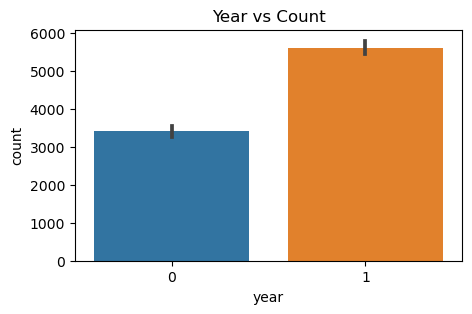

In [13]:
plt.figure(figsize=(5,3))
sns.barplot('year','count',data = bike)
plt.title('Year vs Count')
plt.show()

Inference :
- Bike rentals are more in the year of 2019

### Bi/Multivariate Analysis

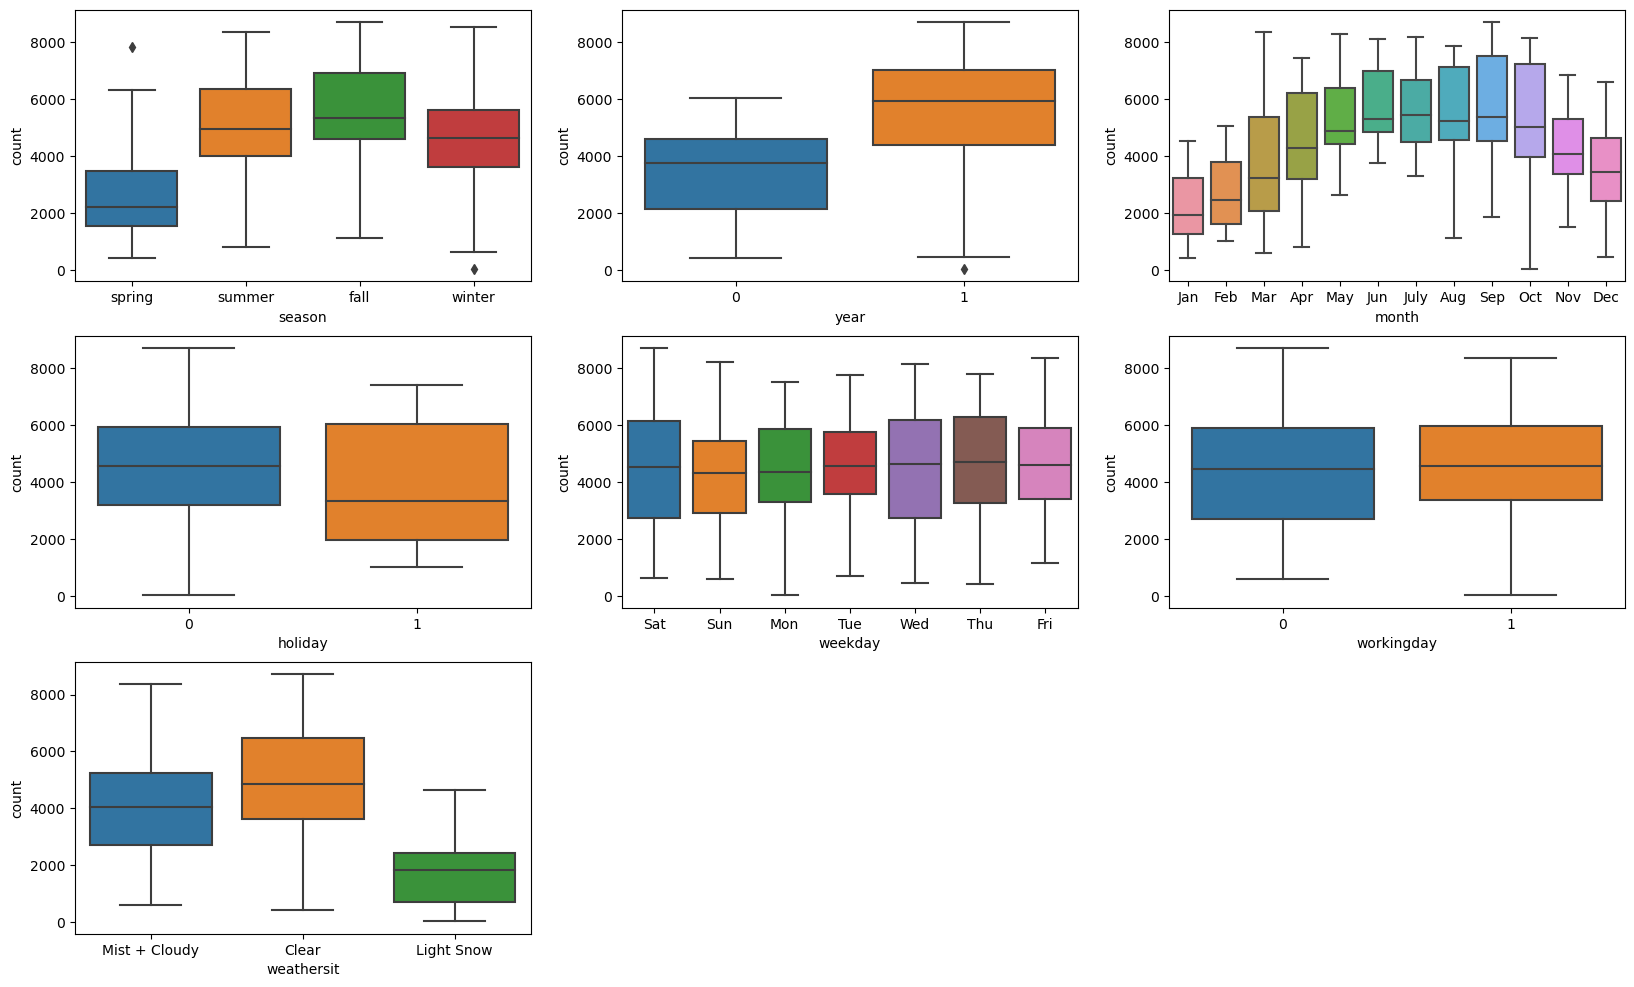

In [14]:
plt.figure(figsize=(20, 12))

plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'count', data = bike)

plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'count', data = bike)

plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'count', data = bike)

plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'count', data = bike)

plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'count', data = bike)

plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = bike)

plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)

plt.show()

Inference :
- Bike rentals are more at fall season ,month of sept and oct

- Bike rentals are more in the year 2019 than 2018

- when the weathersit is clear bike rentals are more

- Bike rentals are more at saturday,wednsday,thursday

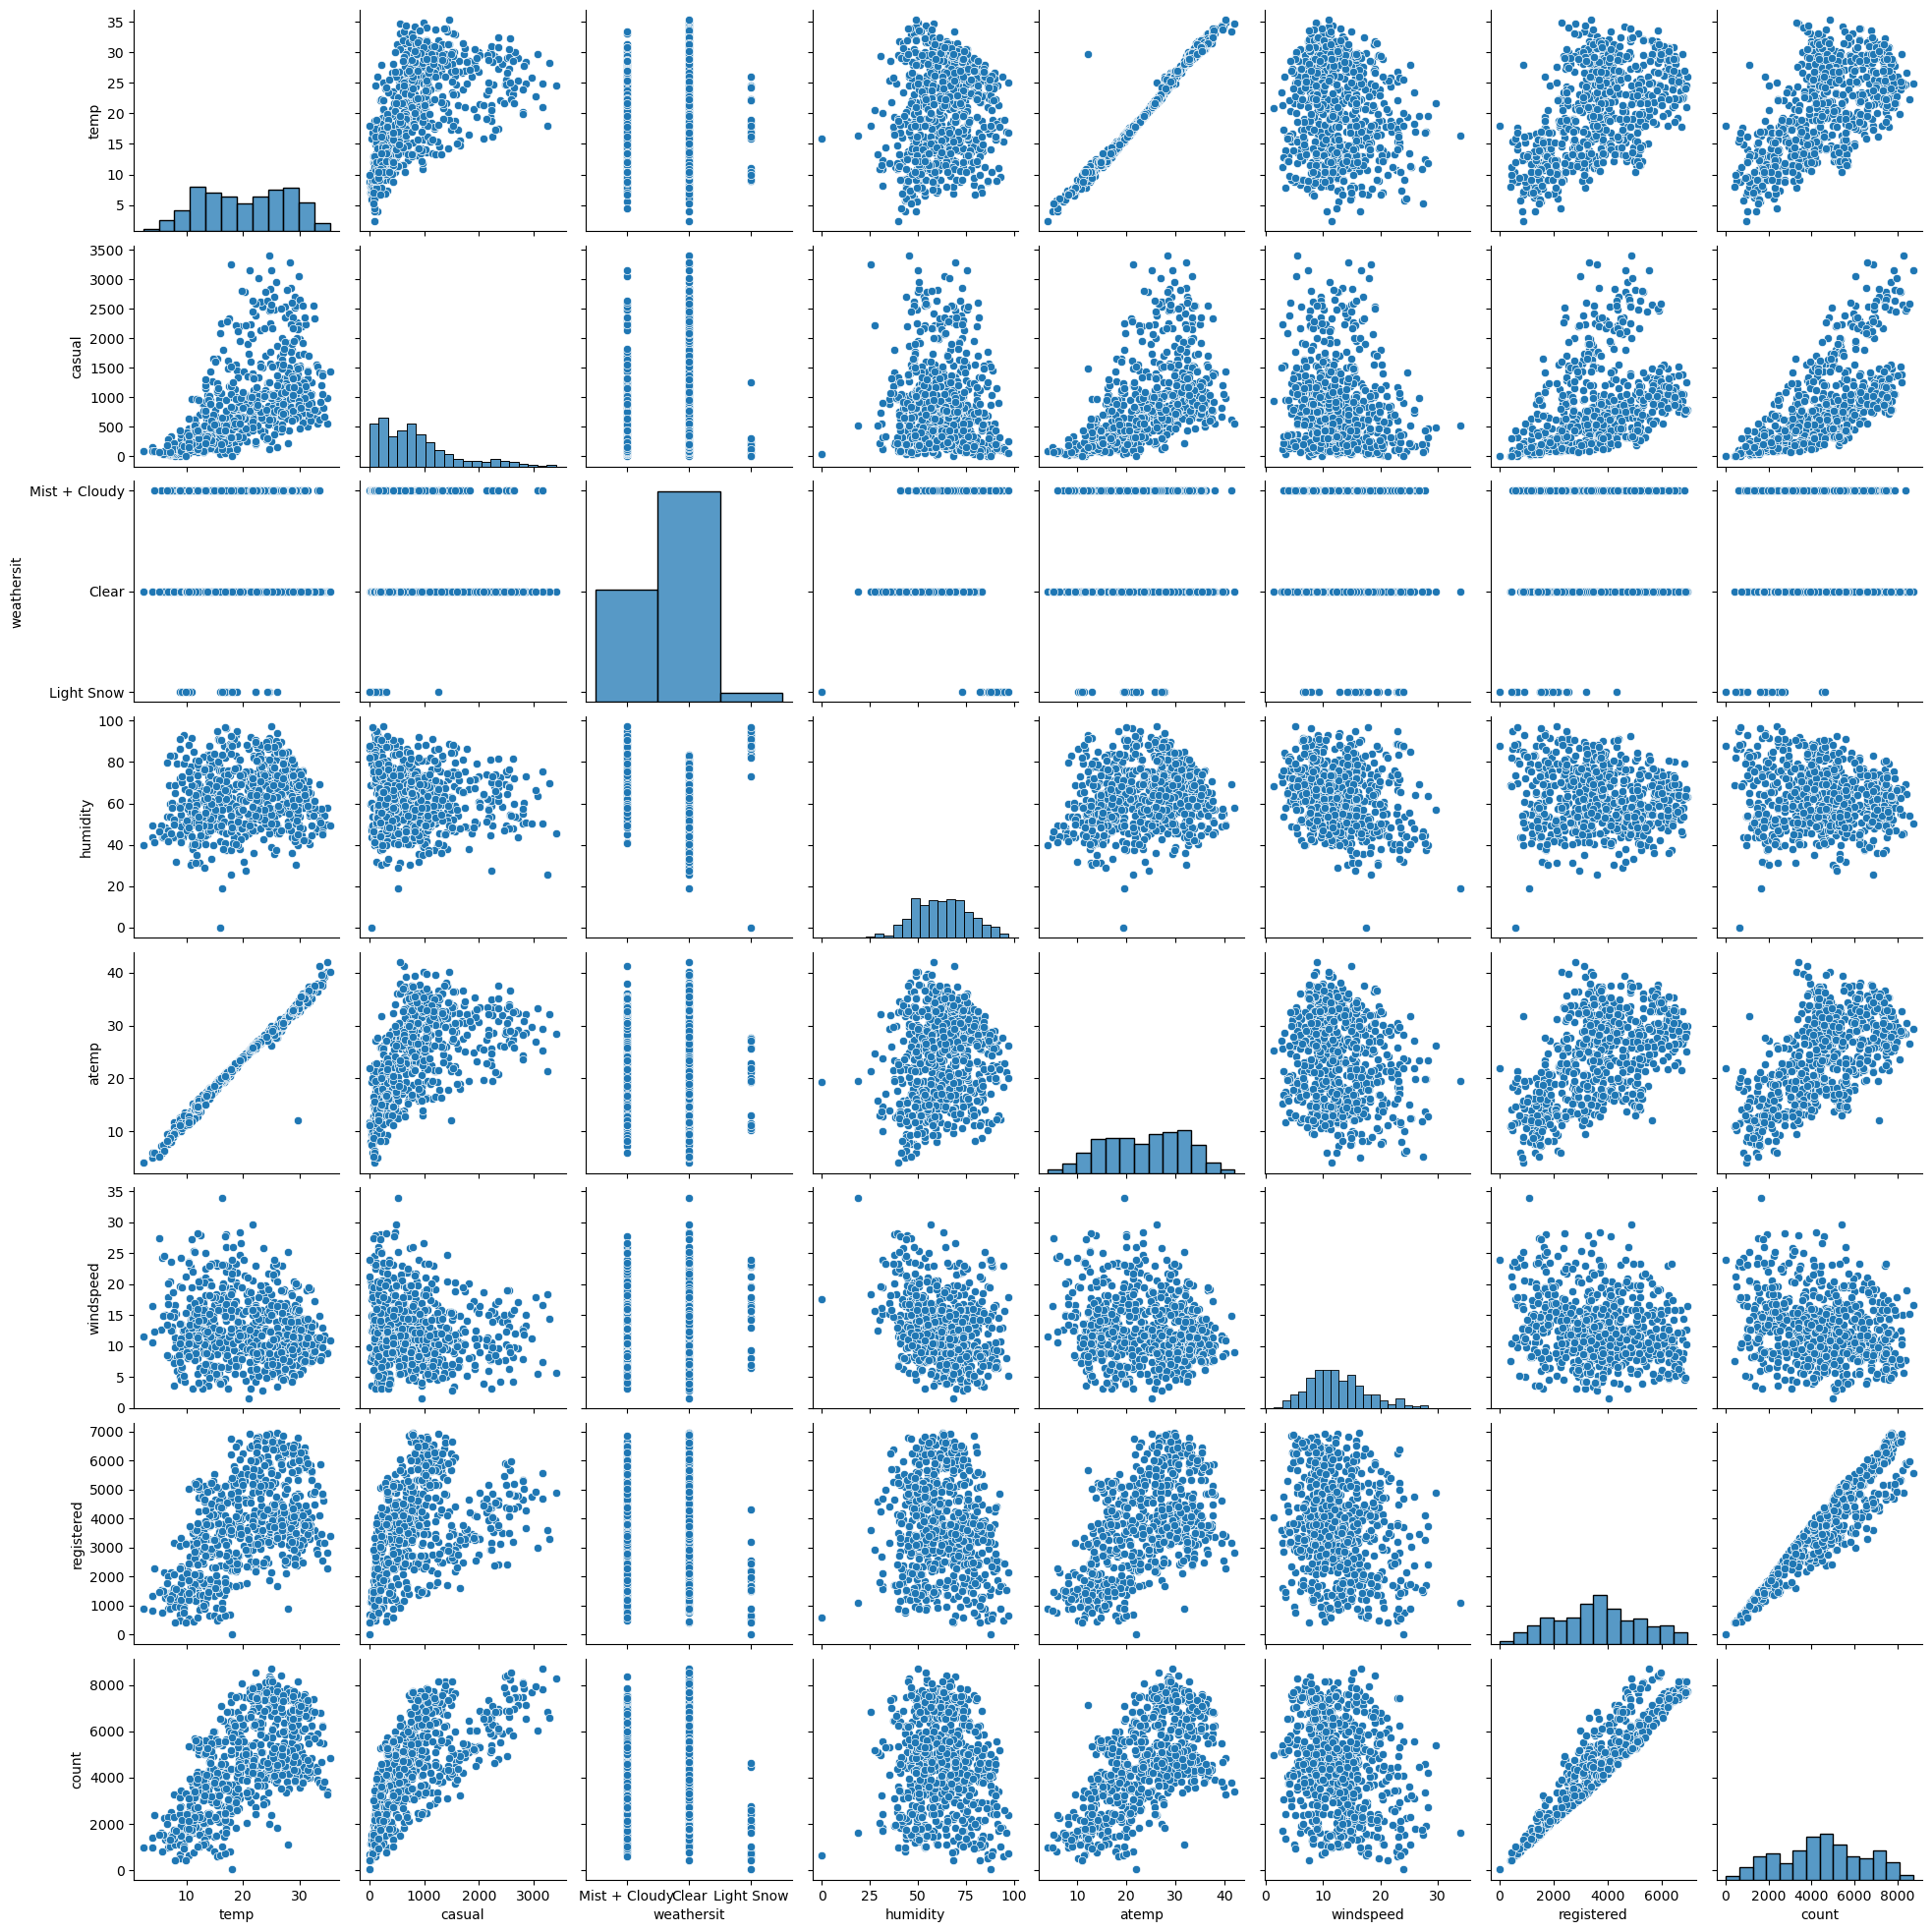

In [15]:
# Pairplot for numerical variables
sns.pairplot(bike , vars = ['temp','casual','weathersit','humidity','atemp','windspeed','registered','count'])
plt.show()

Inference

  By analysing the above pairplot we can see that 'count' is positively correlated to the temp column

- Bike rentals varries with the temp

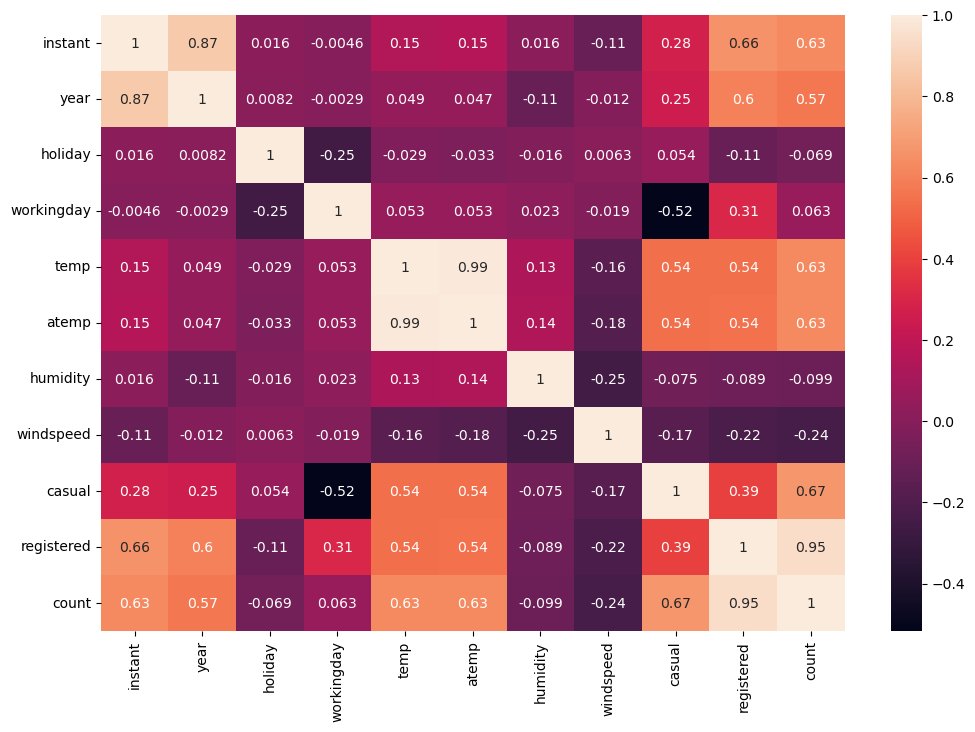

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(bike.corr(),annot= True)
plt.show()

Inference :
- As per the both pair plot and heatmap we can say that columns like 'year','temp','casual','registered' are correalated with the 'count' column

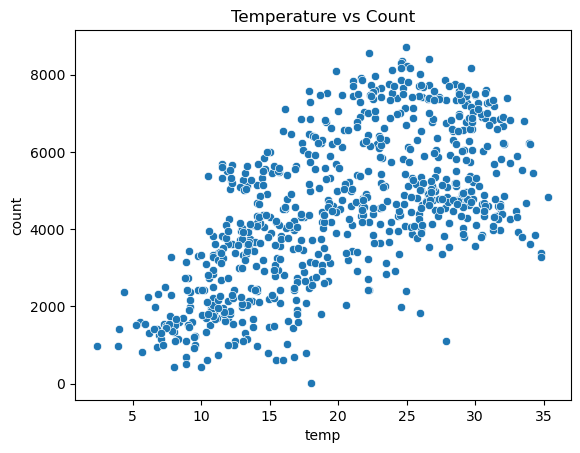

In [17]:
#scatter plot for temp and count
sns.scatterplot(x = 'temp',y ='count' ,data = bike)
plt.title('Temperature vs Count')
plt.show()

Inference :
- Bike rentals are more at higher temp

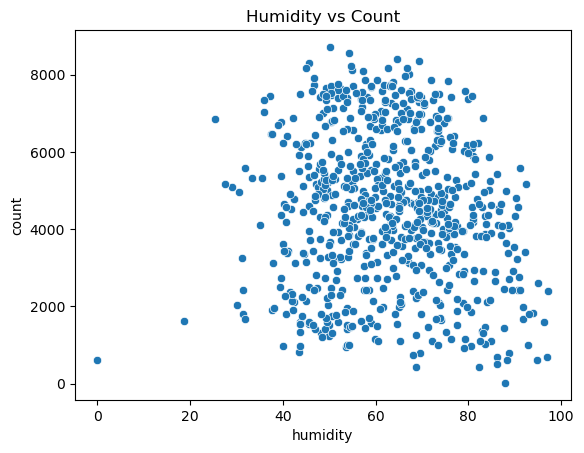

In [18]:
#scatter plot for humidity and count
sns.scatterplot(x = 'humidity',y ='count' ,data = bike)
plt.title('Humidity vs Count')
plt.show()

Inference :
- Bike rentals are more at higher humidity

### Drop unnecessary columns

In [19]:
# Dropping the 'instant','dteday','atemp','casual'and 'registered' columns as they don't affect the dataset
bike.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)

In [20]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
bike.shape

(730, 12)

## Create Dummy variables for non binary columns

In [22]:
#Creating dummies for 'season','month','weekday','weathersit' columns
seasons = pd.get_dummies(bike.season, drop_first = True)
months = pd.get_dummies(bike.month, drop_first = True)
weekdays = pd.get_dummies(bike.weekday, drop_first = True)
weather_sit = pd.get_dummies(bike.weathersit, drop_first = True)

In [23]:
# Add the dummies to the original dataset
bike = pd.concat([seasons,months,weekdays,weather_sit,bike], axis = 1)
bike.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,Jun,Mar,...,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
# Drop the original columns of season ,month ,weekday,weathersit
bike.drop(['season','month','weekday','weathersit'],axis= 1, inplace = True)

In [25]:
bike.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,Jun,Mar,...,Light Snow,Mist + Cloudy,year,holiday,workingday,temp,atemp,humidity,windspeed,count
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
bike.shape

(730, 30)

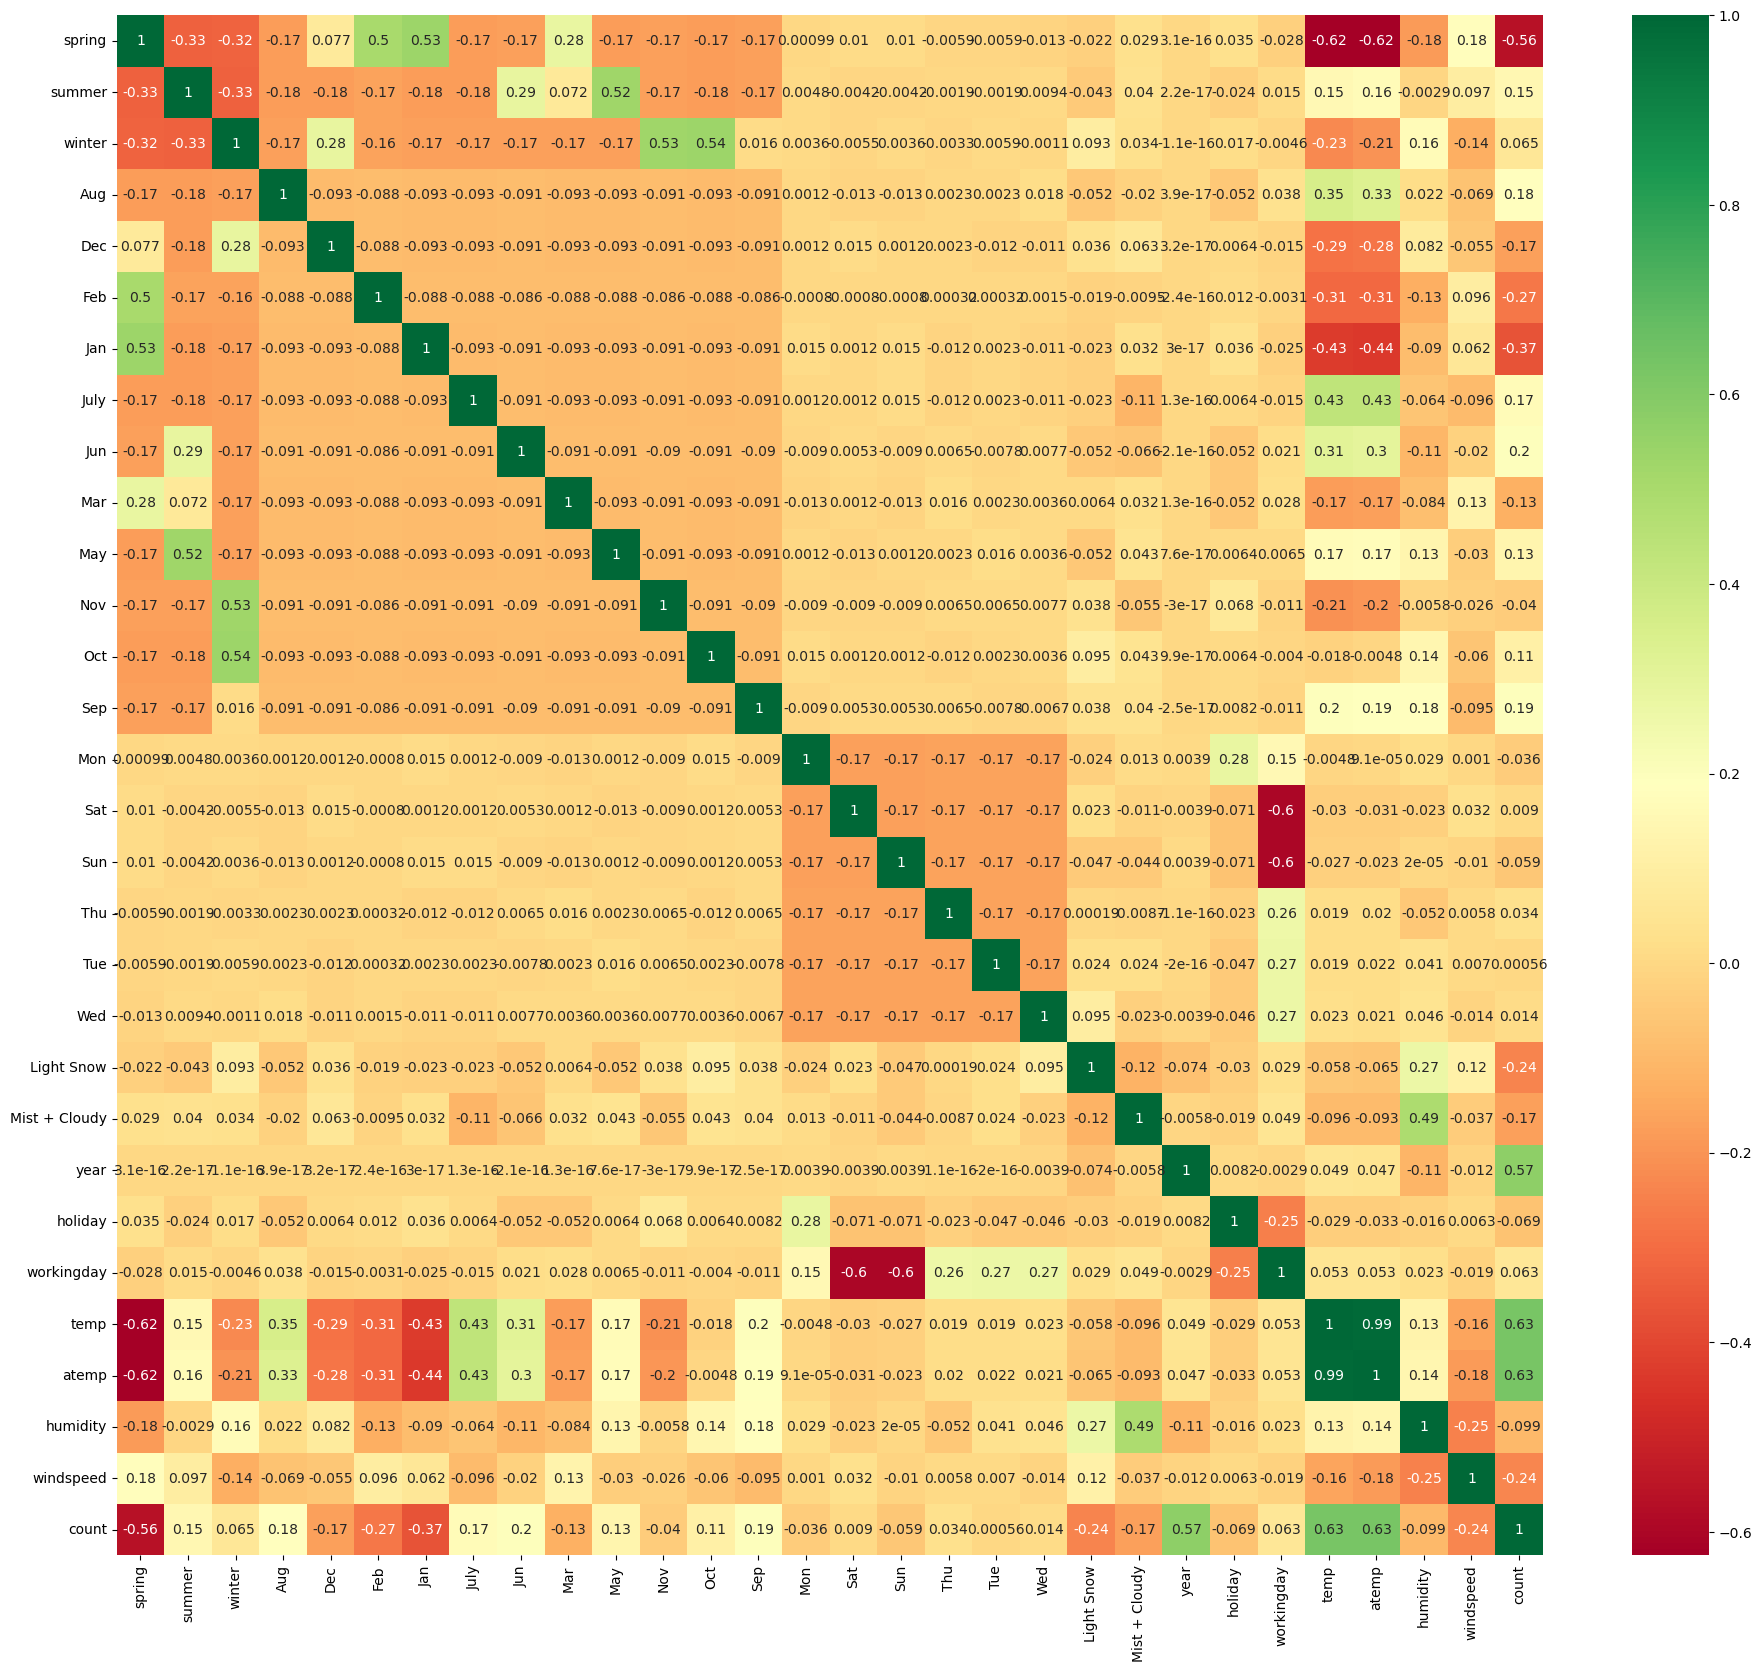

In [27]:
plt.figure(figsize=(23,20))
sns.heatmap(bike.corr(),cmap = 'RdYlGn',annot = True)
plt.show()

As per the above heatmap we can see that the - 
- temp and year are good correlated to the count

- spring have negative correlation with the count

- also summer season and some months like sept,july,aug have high correlation with count

## Spliting the Data into Train Set and Test Set 

In [28]:
from sklearn.model_selection import train_test_split
# train set and test set split (80:20)
bike_train, bike_test= train_test_split(bike,test_size = 0.2 ,random_state = 100)

In [29]:
#train set shape
bike_train.shape

(584, 30)

In [30]:
#test set shape
bike_test.shape

(146, 30)

## Rescaling the Features 

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
bike_train.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,Jun,Mar,...,Light Snow,Mist + Cloudy,year,holiday,workingday,temp,atemp,humidity,windspeed,count
367,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,6.150000,6.31375,44.1250,24.499957,2236
648,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,17.835000,21.55835,46.3333,12.166932,7570
44,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,17.015000,19.91750,37.5833,27.999836,1913
705,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,13.154153,16.09790,76.4167,8.750200,5008
379,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,6.833347,8.08125,41.9167,16.834286,2311


In [33]:
#create a list of numerical variables
num_var = ['windspeed','temp','humidity','count']

In [34]:
bike_train[num_var] = scaler.fit_transform(bike_train[num_var])
bike_train.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,Jun,Mar,...,Light Snow,Mist + Cloudy,year,holiday,workingday,temp,atemp,humidity,windspeed,count
367,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0.113228,6.31375,0.454701,0.695175,0.254717
648,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.468352,21.55835,0.477458,0.299450,0.868385
44,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0.443431,19.91750,0.387290,0.807474,0.217556
705,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0.326094,16.09790,0.787463,0.189819,0.573631
379,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0.133996,8.08125,0.431945,0.449210,0.263346


In [35]:
# after scaling checking the numeric variables
bike_train.describe()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,Jun,Mar,...,Light Snow,Mist + Cloudy,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.251712,0.246575,0.250000,0.090753,0.087329,0.073630,0.087329,0.075342,0.077055,0.090753,...,0.027397,0.342466,0.513699,0.027397,0.667808,0.537414,23.500998,0.649499,0.319463,0.515792
std,0.434369,0.431387,0.433384,0.287504,0.282558,0.261392,0.282558,0.264169,0.266907,0.287504,...,0.163378,0.474941,0.500241,0.163378,0.471403,0.225336,8.062524,0.144219,0.168114,0.225336
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.953480,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.340113,16.592913,0.535852,0.199177,0.350696
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.545191,24.163125,0.653714,0.294764,0.522837
75%,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.736512,30.256325,0.752361,0.410413,0.691872
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,42.044800,1.000000,1.000000,1.000000


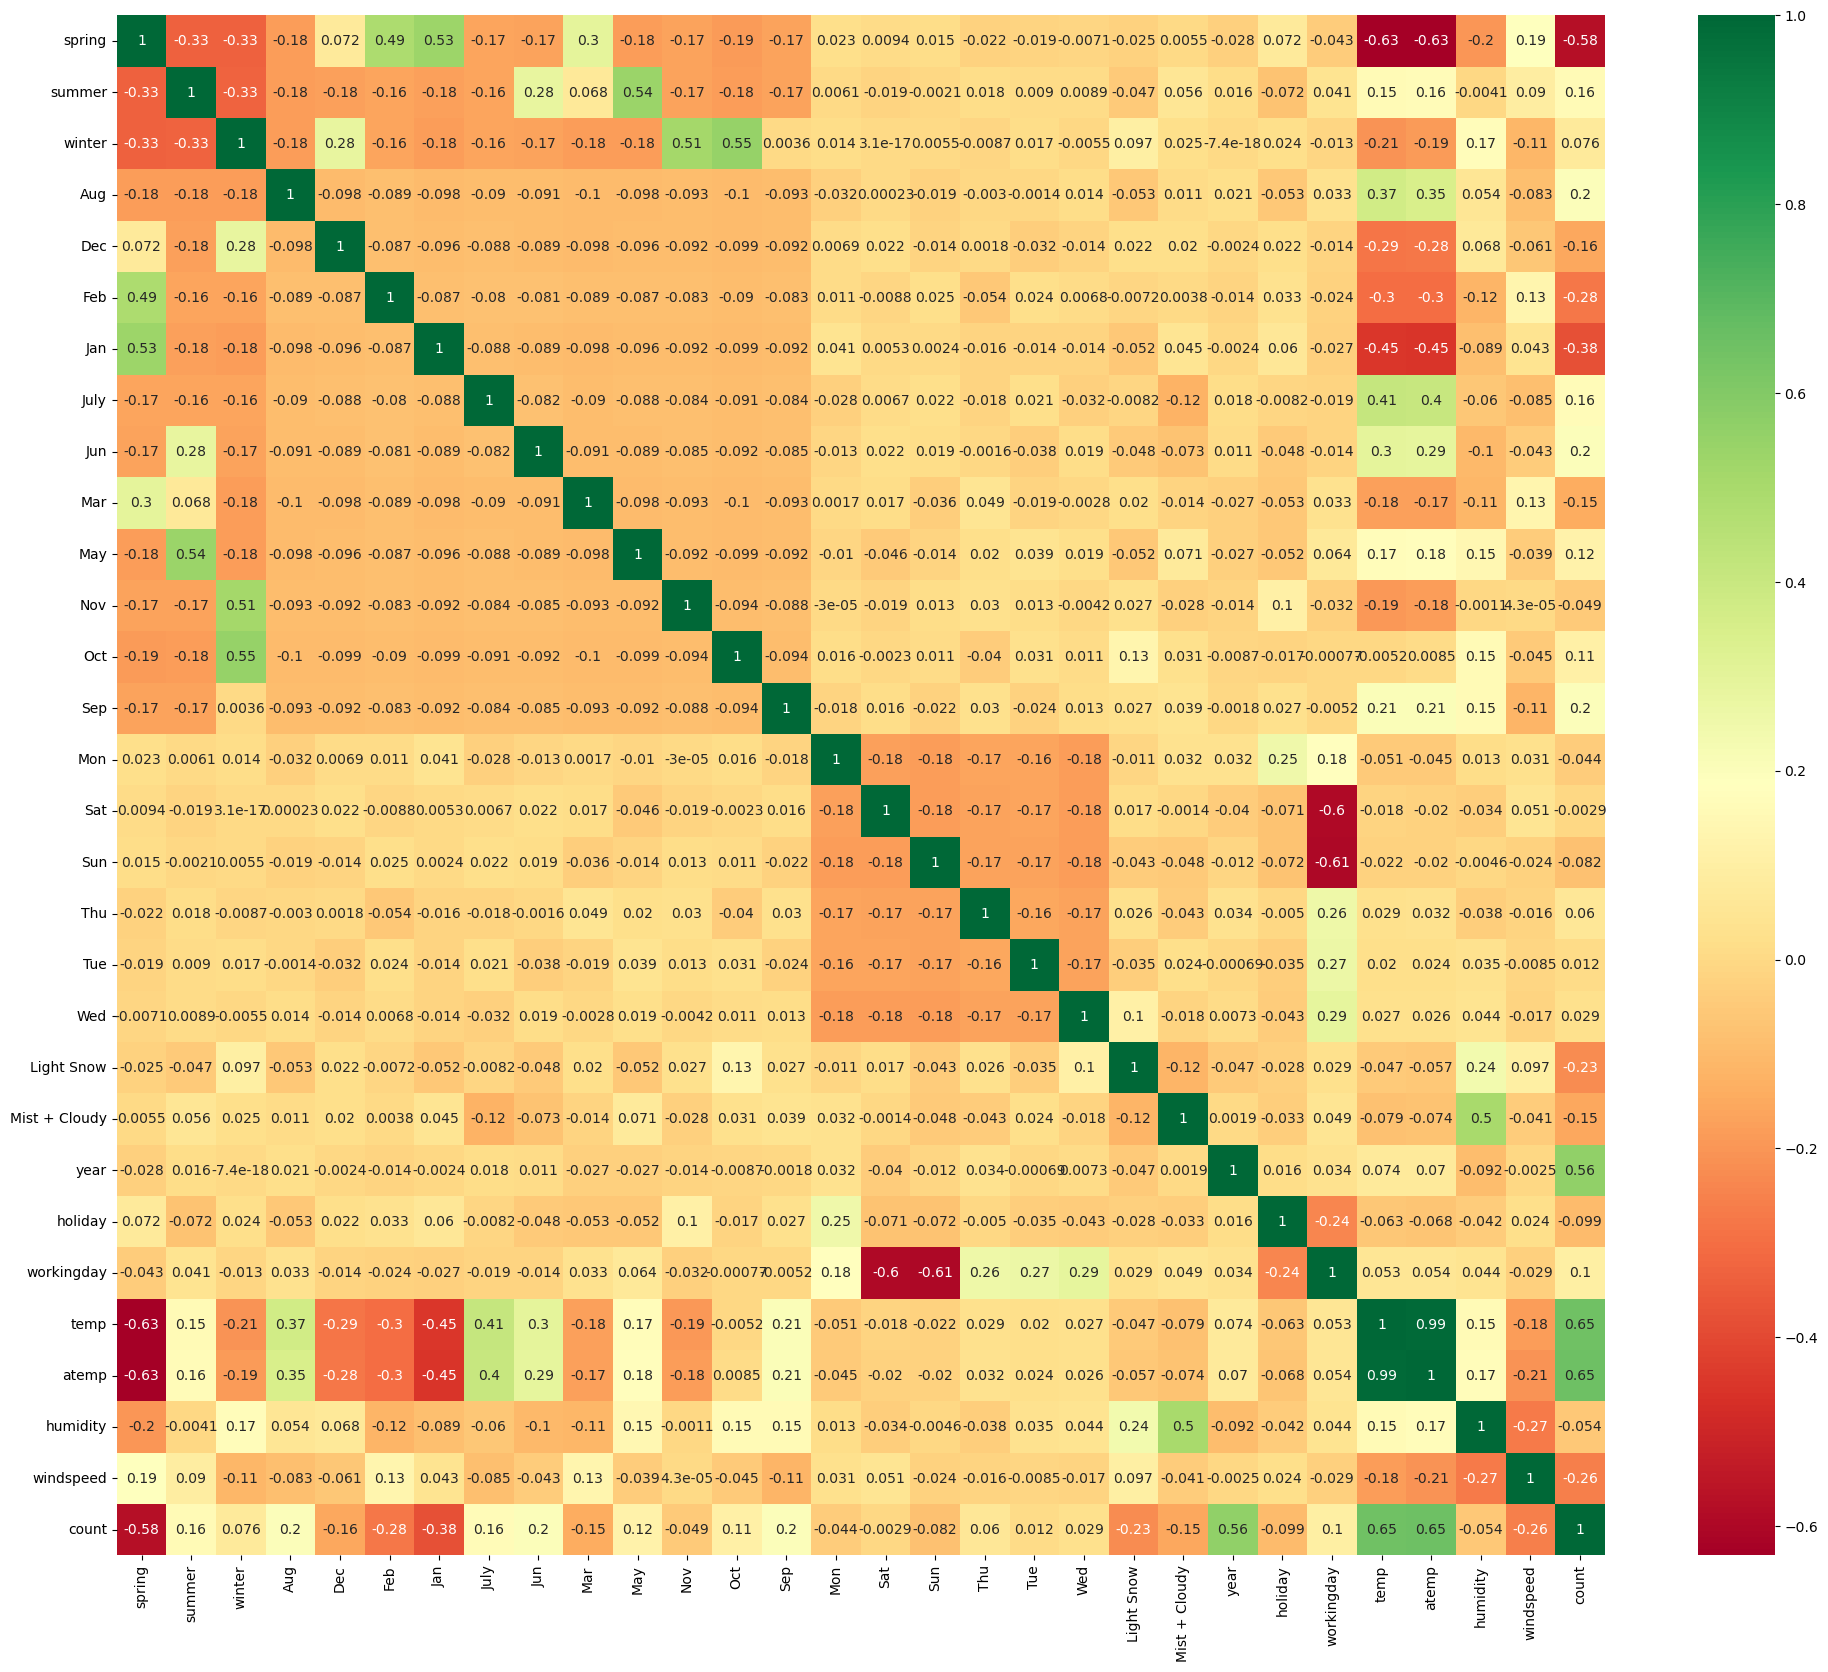

In [36]:
# check correlation 
plt.figure(figsize=(24,20))
sns.heatmap(bike_train.corr(),annot = True,cmap ='RdYlGn')
plt.show()

In [37]:
y_train = bike_train.pop('count')
X_train = bike_train

## Model Building

In [38]:
#Building a linear model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [39]:
lr = LinearRegression()

In [40]:
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
rfe = RFE(lr, n_features_to_select =12 ,step = 1)
rfe = rfe.fit(X_train,y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('spring', True, 1),
 ('summer', False, 8),
 ('winter', True, 1),
 ('Aug', False, 12),
 ('Dec', False, 2),
 ('Feb', False, 6),
 ('Jan', False, 3),
 ('July', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 17),
 ('May', False, 11),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', False, 5),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thu', False, 15),
 ('Tue', False, 10),
 ('Wed', False, 16),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('year', True, 1),
 ('holiday', False, 4),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 18),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [43]:
cols = X_train.columns[rfe.support_]
cols

Index(['spring', 'winter', 'July', 'Nov', 'Sat', 'Light Snow', 'Mist + Cloudy',
       'year', 'workingday', 'temp', 'humidity', 'windspeed'],
      dtype='object')

In [44]:
X_train.columns[~rfe.support_]

Index(['summer', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Oct', 'Sep',
       'Mon', 'Sun', 'Thu', 'Tue', 'Wed', 'holiday', 'atemp'],
      dtype='object')

In [45]:
#adding constant variable
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [46]:
X_train_new = sm.add_constant(X_train[cols])
model_1 = sm.OLS(y_train,X_train_new).fit()

In [47]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     259.0
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          7.55e-222
Time:                        16:09:37   Log-Likelihood:                 586.05
No. Observations:                 584   AIC:                            -1146.
Df Residuals:                     571   BIC:                            -1089.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2842      0.031      9.238      0.000       0.224       0.345
spring           -0.1191      0.014     -8.470      0.000      -0.147      -0.092
winter            0.0717      0.012      5.892      0.000       0.048       0.096
July             -0.0879      0.016     -5.573      0.000      -0.119      -0.057
Nov              -0.0477      0.016     -2.946      0.003      -0.080      -0.016
Sat               0.0665      0.013      5.107      0.000       0.041       0.092
Light Snow       -0.2532      0.025     -9.982      0.000      -0.303      -0.203
Mist + Cloudy    -0.0566      0.010     -5.728      0.000      -0.076      -0.037
year              0.2269      0.008     30.095      0.000       0.212       0.242
workingday        0.0569      0.010      5.743      0.000       0.037       0.076
temp              0.4959      0.029     17.266      0.000       0.440       0.552
humidity         -0.1462      0.036     -4.093      0.000      -0.216      -0.076
windspeed        -0.1745      0.024     -7.276      0.000      -0.222      -0.127
==============================================================================
Omnibus:                       82.214   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.593
Skew:                          -0.714   Prob(JB):                     1.53e-47
Kurtosis:                       5.611   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Inference :
- We have P-value less than 0.05 i.e. model is strong

- We can see that our model is strong as the r2 and adjusted r2 is same around 84%

In [48]:
# let's check our VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF',ascending = False)
vif

,Features,VIF
0,const,68.71
10,temp,3.04
1,spring,2.70
2,winter,2.02
11,humidity,1.92
7,Mist + Cloudy,1.60
9,workingday,1.58
5,Sat,1.57
4,Nov,1.41
3,July,1.26


- We can see that VIF of 'const' is high , so can be dropped

In [49]:
X_train_1 = X_train_new.drop(['const'],axis = 1)

In [50]:
#rebuilding the model 
X_train_m2 = sm.add_constant(X_train_1)
model_2 = sm.OLS(y_train,X_train_m2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     259.0
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          7.55e-222
Time:                        16:09:37   Log-Likelihood:                 586.05
No. Observations:                 584   AIC:                            -1146.
Df Residuals:                     571   BIC:                            -1089.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2842      0.031      9.238      0.000       0.224       0.345
spring           -0.1191      0.014     -8.470      0.000      -0.147      -0.092
winter            0.0717      0.012      5.892      0.000       0.048       0.096
July             -0.0879      0.016     -5.573      0.000      -0.119      -0.057
Nov              -0.0477      0.016     -2.946      0.003      -0.080      -0.016
Sat               0.0665      0.013      5.107      0.000       0.041       0.092
Light Snow       -0.2532      0.025     -9.982      0.000      -0.303      -0.203
Mist + Cloudy    -0.0566      0.010     -5.728      0.000      -0.076      -0.037
year              0.2269      0.008     30.095      0.000       0.212       0.242
workingday        0.0569      0.010      5.743      0.000       0.037       0.076
temp              0.4959      0.029     17.266      0.000       0.440       0.552
humidity         -0.1462      0.036     -4.093      0.000      -0.216      -0.076
windspeed        -0.1745      0.024     -7.276      0.000      -0.222      -0.127
==============================================================================
Omnibus:                       82.214   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.593
Skew:                          -0.714   Prob(JB):                     1.53e-47
Kurtosis:                       5.611   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF',ascending = False)
vif

,Features,VIF
10,humidity,23.60
9,temp,15.91
8,workingday,4.43
11,windspeed,4.23
0,spring,2.71
1,winter,2.50
6,Mist + Cloudy,2.25
7,year,2.06
4,Sat,1.76
3,Nov,1.51


- humidity column have high VIF so dropped it

In [52]:
X_train_2 = X_train_1.drop(['humidity'],axis = 1)

In [53]:
X_train_m3 = sm.add_constant(X_train_2)
model_2 = sm.OLS(y_train,X_train_m3).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     273.4
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          1.67e-219
Time:                        16:09:37   Log-Likelihood:                 577.61
No. Observations:                 584   AIC:                            -1131.
Df Residuals:                     572   BIC:                            -1079.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2023      0.024      8.542      0.000       0.156       0.249
spring           -0.1219      0.014     -8.562      0.000      -0.150      -0.094
winter            0.0631      0.012      5.195      0.000       0.039       0.087
July             -0.0808      0.016     -5.081      0.000      -0.112      -0.050
Nov              -0.0452      0.016     -2.756      0.006      -0.077      -0.013
Sat               0.0694      0.013      5.265      0.000       0.043       0.095
Light Snow       -0.2947      0.024    -12.499      0.000      -0.341      -0.248
Mist + Cloudy    -0.0803      0.008     -9.902      0.000      -0.096      -0.064
year              0.2310      0.008     30.503      0.000       0.216       0.246
workingday        0.0586      0.010      5.837      0.000       0.039       0.078
temp              0.4694      0.028     16.548      0.000       0.414       0.525
windspeed        -0.1463      0.023     -6.283      0.000      -0.192      -0.101
==============================================================================
Omnibus:                       83.091   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.897
Skew:                          -0.722   Prob(JB):                     4.83e-48
Kurtosis:                       5.621   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,6.03
8,workingday,4.29
10,windspeed,4.23
7,year,2.06
1,winter,1.94
0,spring,1.84
4,Sat,1.74
6,Mist + Cloudy,1.54
3,Nov,1.50
2,July,1.32


- Here we drop the windspeed column because it seems to be insignificant by VIF value and it has a very low correlation

In [55]:
#dropping 'windspeed' column
X_train_3 = X_train_2.drop(['windspeed'],axis =1)

In [56]:
X_train_m4 = sm.add_constant(X_train_3)
model_4 = sm.OLS(y_train,X_train_m4).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     278.2
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          1.79e-212
Time:                        16:09:38   Log-Likelihood:                 558.12
No. Observations:                 584   AIC:                            -1094.
Df Residuals:                     573   BIC:                            -1046.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1440      0.023      6.399      0.000       0.100       0.188
spring           -0.1232      0.015     -8.377      0.000      -0.152      -0.094
winter            0.0738      0.012      5.939      0.000       0.049       0.098
July             -0.0771      0.016     -4.700      0.000      -0.109      -0.045
Nov              -0.0507      0.017     -2.997      0.003      -0.084      -0.017
Sat               0.0656      0.014      4.826      0.000       0.039       0.092
Light Snow       -0.3098      0.024    -12.787      0.000      -0.357      -0.262
Mist + Cloudy    -0.0782      0.008     -9.333      0.000      -0.095      -0.062
year              0.2300      0.008     29.411      0.000       0.215       0.245
workingday        0.0580      0.010      5.594      0.000       0.038       0.078
temp              0.4888      0.029     16.780      0.000       0.432       0.546
==============================================================================
Omnibus:                       87.864   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.103
Skew:                          -0.734   Prob(JB):                     2.98e-55
Kurtosis:                       5.858   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,4.97
8,workingday,4.19
7,year,2.05
1,winter,1.93
4,Sat,1.70
6,Mist + Cloudy,1.54
0,spring,1.48
3,Nov,1.48
2,July,1.31
5,Light Snow,1.06


Yes ! We have our Model.

The VIF and P- values both are in the acceptable range, so we can go ahead and make our Predictions using this model only.

### Residual Analysis of the Train Data

Now to check of the error terms are also normally distributed (which is infact one of the major assumptions of linear regression),let us plot the histogram of the error terms and see what it looks like.

In [58]:
y_train_pred = model_4.predict(X_train_m4)

In [59]:
#computing the residuals
res = y_train - y_train_pred

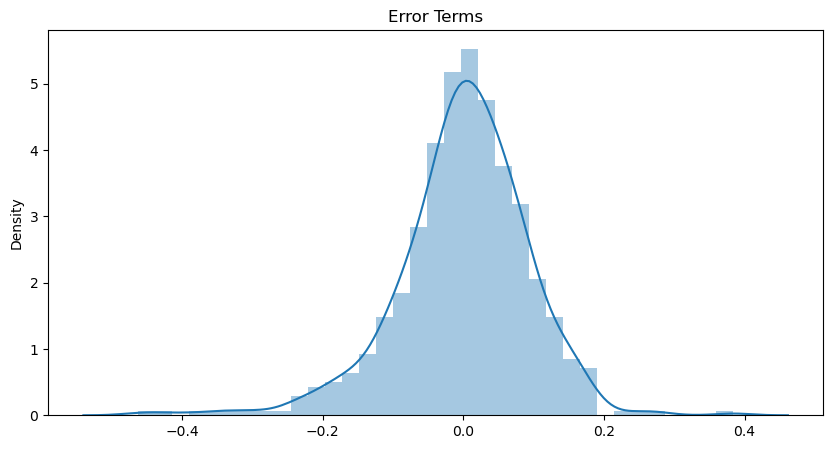

In [60]:
#plot histogram of the error terms
plt.figure(figsize=(10,5))
sns.distplot(res)
plt.title('Error Terms')
plt.show()

In [61]:
# Final model Evalution
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     278.2
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          1.79e-212
Time:                        16:09:39   Log-Likelihood:                 558.12
No. Observations:                 584   AIC:                            -1094.
Df Residuals:                     573   BIC:                            -1046.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1440      0.023      6.399      0.000       0.100       0.188
spring           -0.1232      0.015     -8.377      0.000      -0.152      -0.094
winter            0.0738      0.012      5.939      0.000       0.049       0.098
July             -0.0771      0.016     -4.700      0.000      -0.109      -0.045
Nov              -0.0507      0.017     -2.997      0.003      -0.084      -0.017
Sat               0.0656      0.014      4.826      0.000       0.039       0.092
Light Snow       -0.3098      0.024    -12.787      0.000      -0.357      -0.262
Mist + Cloudy    -0.0782      0.008     -9.333      0.000      -0.095      -0.062
year              0.2300      0.008     29.411      0.000       0.215       0.245
workingday        0.0580      0.010      5.594      0.000       0.038       0.078
temp              0.4888      0.029     16.780      0.000       0.432       0.546
==============================================================================
Omnibus:                       87.864   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.103
Skew:                          -0.734   Prob(JB):                     2.98e-55
Kurtosis:                       5.858   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Applying scaling on the Test sets

In [62]:
#creating numerical variables
num_vars = ['temp','humidity','windspeed','count']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,Jun,Mar,...,Light Snow,Mist + Cloudy,year,holiday,workingday,temp,atemp,humidity,windspeed,count
184,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0.865022,33.27085,1.865042,0.056255,0.692706
535,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0.938473,36.04875,1.725746,0.078579,0.712034
299,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0.527363,22.85230,2.396893,0.136540,0.303382
221,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0.917644,34.24915,1.215425,0.138263,0.547400
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0.849674,32.19710,0.853260,0.201802,0.569029


In [63]:
bike_test[num_vars].describe()

,temp,humidity,windspeed,count
count,146.000000,146.000000,146.000000,146.000000
mean,0.588218,1.801839,0.130413,0.517368
std,0.251368,0.461133,0.051874,0.212757
min,0.036034,0.698771,0.015460,0.055683
25%,0.365947,1.502561,0.092206,0.391251
50%,0.578341,1.739678,0.127605,0.508916
75%,0.833503,2.080946,0.161517,0.649994
max,1.026177,2.881888,0.286388,0.963300


### Dividing into X_test and y_test

In [64]:
X_test = bike_test
y_test = bike_test.pop('count')

In [65]:
X_train_3.columns

Index(['spring', 'winter', 'July', 'Nov', 'Sat', 'Light Snow', 'Mist + Cloudy',
       'year', 'workingday', 'temp'],
      dtype='object')

In [66]:
X_test_new = X_test[X_train_3.columns]

X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,spring,winter,July,Nov,Sat,Light Snow,Mist + Cloudy,year,workingday,temp
184,1.0,0,0,1,0,0,0,1,0,0,0.865022
535,1.0,0,0,0,0,0,0,0,1,1,0.938473
299,1.0,0,1,0,0,0,0,1,0,1,0.527363
221,1.0,0,0,0,0,0,0,0,0,1,0.917644
152,1.0,0,0,0,0,0,0,0,0,1,0.849674


In [67]:
# Making predictions
y_pred = model_4.predict(X_test_new)

### Model Evalution

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test ,y_pred)

0.7731022371162556

In [69]:
#adjusted r2
Adj_r2=1-(1-0.7731022)*(11-1)/(11-1-1)
print(Adj_r2)

0.7478913333333332


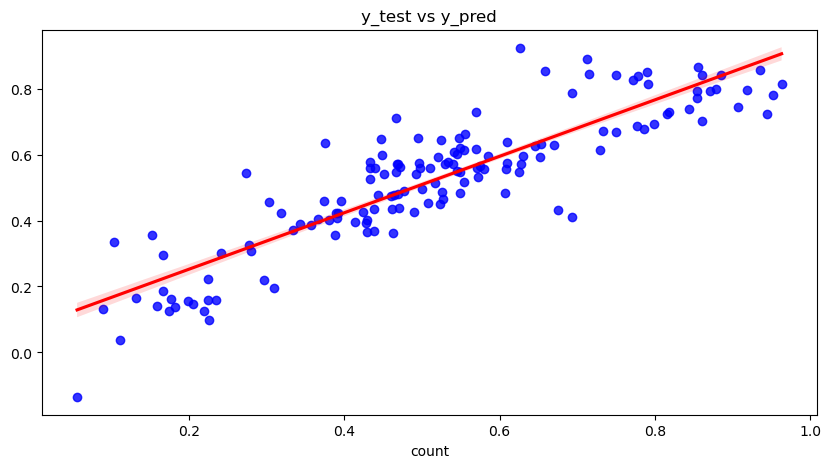

In [70]:
#plotting the regression line
plt.figure(figsize=(10,5))
sns.regplot(x = y_test ,y=y_pred, ci = 68 ,fit_reg = True , scatter_kws = {'color':'blue'},line_kws = {'color':'red'})
plt.title('y_test vs y_pred')
plt.show()

Inference :
- We can see that temperature variable have the highest correlation 

- Also we can observed that the variables in the equation for best fitted line which are positively impacting the bike rentals

- We also observe that there are some variables having negative correlations
    
    - which indicates a negative coefficient as the independent variable wil increase the dependent will decrease
    
    - some of the negative correlations :jan ,light snow ,mist+cloudy,spring,holiday
    

### Final result between Train and Test :

#### Train R2 = 82.9


#### Train Adjusted R2 = 82.6



#### Test R2 = 0.7731



#### Test Adjusted R2 = 0.7478